In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# We have to Predict whether income exceeds $50K/yr based on census data
#this data comes from a text file

In [3]:
income = pd.read_csv('adult.data.txt')

In [4]:
income.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship',
        'race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary']

In [6]:
#As we can see there is no columns name in the dataset we have to provide.I have stored the columns 
#name in the columns list

In [7]:
income = pd.read_csv('adult.data.txt',names=columns)

In [8]:
income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
len(income)

32561

In [10]:
#So we have to predict income will be greater than >50k or less than 50K for new set of data

In [11]:
#Before lets do some analysis in the dataset

In [12]:
#before doing analysis lets see how many null values are there in the all columns

In [13]:
income.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [14]:
#No null values are there

In [15]:
income['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [16]:
def convert(num):
    if num==' >50K':
        return 1
    else:
        return 0

In [17]:
income['salary_num'] = income['salary'].apply(convert)

In [18]:
income['salary_num'].value_counts()

0    24720
1     7841
Name: salary_num, dtype: int64

In [19]:
income.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_num
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0


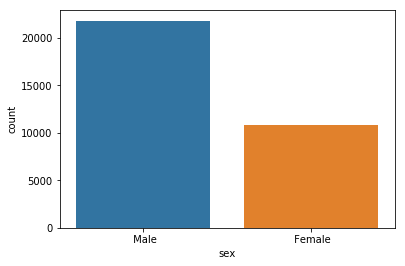

In [20]:
sns.countplot(income['sex'])

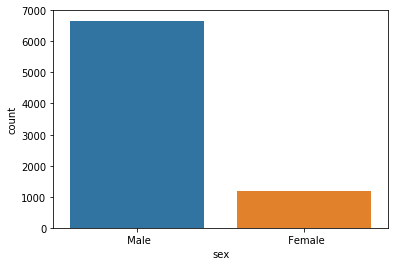

In [21]:
sns.countplot(income[income['salary_num']==1]['sex'])

In [22]:
#male is around 22,000 and female is around 10,000
(22000/10000)
#so males are 2.2 times higher than the females

2.2

In [23]:
#in >50k male is around 6,500 and female is around 1,000
(6500/1000)
#so males are 6.5 times higher than females when it comes to income greater than 50k

6.5

In [24]:
#so around 8000 females get less than 50k
#around 15,500 males get less than 50k
#so ratio is:
#so if we cal in to per unit
6500/22000


0.29545454545454547

In [25]:
1000/10000

0.1

In [26]:
#so 30% of the males get >50k
#only 10% of the females get >50k

In [27]:
#why this lets see

In [28]:
income_sex  =income[income['sex']==' Female']

In [29]:
income_sex['occupation'].value_counts()

 Adm-clerical         2537
 Other-service        1800
 Prof-specialty       1515
 Sales                1263
 Exec-managerial      1159
 ?                     841
 Machine-op-inspct     550
 Tech-support          348
 Craft-repair          222
 Handlers-cleaners     164
 Priv-house-serv       141
 Transport-moving       90
 Protective-serv        76
 Farming-fishing        65
Name: occupation, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

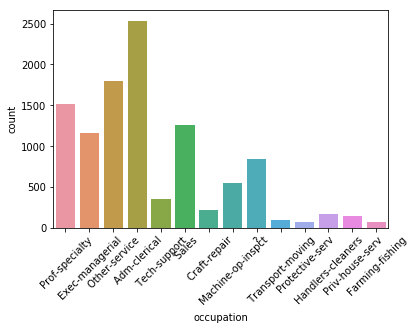

In [30]:
sns.countplot(income_sex['occupation'])
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

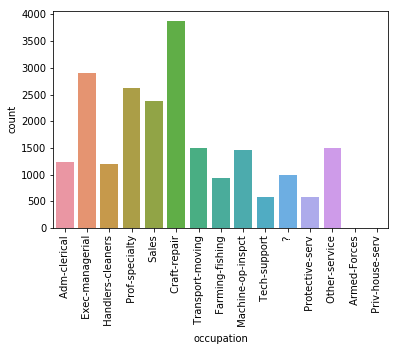

In [31]:
sns.countplot(income[income['sex']==' Male']['occupation'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

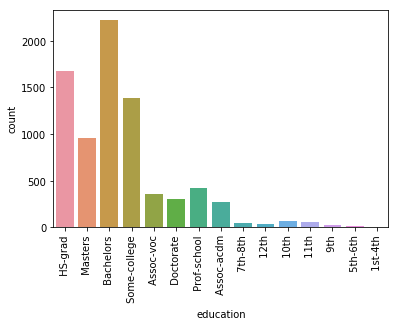

In [32]:
sns.countplot(income[income['salary_num']==1]['education'])
plt.xticks(rotation=90)

In [33]:
#WTF bachelors are more likely to get >50K 
#1)the reanking is Bachelors
#2)HS-grad
#3)Some-college
#this top three are getting >50K


In [34]:
income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_num
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [35]:
#so i want know what type of work did the bachelors that their number of getting >50k is on top
income['education'][0]

' Bachelors'

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

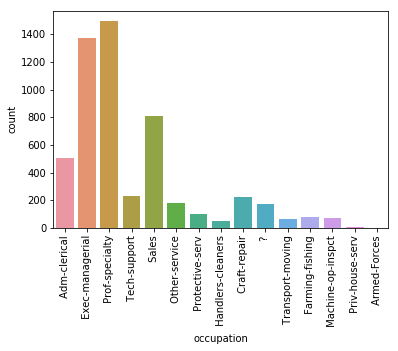

In [36]:
sns.countplot(income[income['education']==' Bachelors']['occupation'])
plt.xticks(rotation=90)

In [37]:
income['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [38]:
#min(income['age'])
max(income['age'])

90

(array([ 5570.,  5890.,  6048.,  6163.,  3967.,  2591.,  1595.,   496.,
          174.,    67.]),
 array([ 17. ,  24.3,  31.6,  38.9,  46.2,  53.5,  60.8,  68.1,  75.4,
         82.7,  90. ]),
 <a list of 10 Patch objects>)

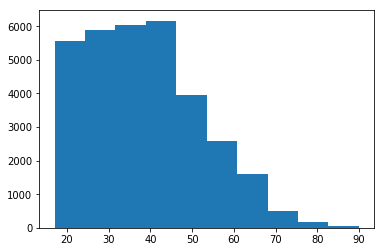

In [39]:
plt.hist(income['age'],bins=10)

In [40]:
de={'17-27':0,'27-37':0,'37-47':0,'47-57':0,'57-67':0,'67-77':0,'77-90':0}

In [41]:
def fff(age):
    if age>=17 and age<27:
        de['17-27']+=1
    if age>=27 and age<37:
        de['27-37']+=1
    if age>=37 and age<47:
        de['37-47']+=1
    if age>=47 and age<57:
        de['47-57']+=1
    if age>=57 and age<67:
        de['57-67']+=1
    if age>=67 and age<77:
        de['67-77']+=1
    if age>=77 and age<90:
        de['77-90']+=1
for i in income['age']:
    fff(i)

In [42]:
fff

<function __main__.fff>

In [43]:
print(de)

{'17-27': 7196, '27-37': 8627, '37-47': 7848, '47-57': 5167, '57-67': 2715, '67-77': 813, '77-90': 152}


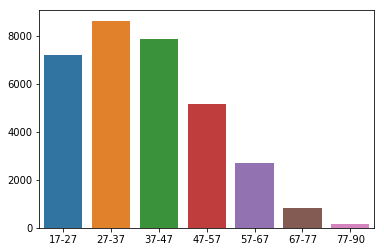

In [44]:
x = list(de.keys())
y = list(de.values())
sns.barplot(x,y)

(array([   371.,   1007.,   1144.,  11429.,   2405.,   3223.,   1544.,
           381.,    170.,    116.]),
 array([  1. ,  10.8,  20.6,  30.4,  40.2,  50. ,  59.8,  69.6,  79.4,
         89.2,  99. ]),
 <a list of 10 Patch objects>)

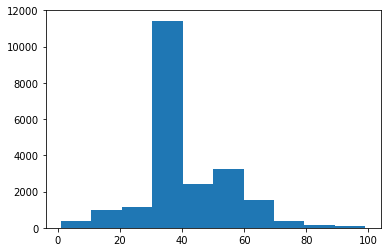

In [45]:
plt.hist(income[income['sex']==' Male']['hours-per-week'])

(array([  365.,  1185.,  1173.,  6306.,   714.,   654.,   252.,    67.,
           32.,    23.]),
 array([  1. ,  10.8,  20.6,  30.4,  40.2,  50. ,  59.8,  69.6,  79.4,
         89.2,  99. ]),
 <a list of 10 Patch objects>)

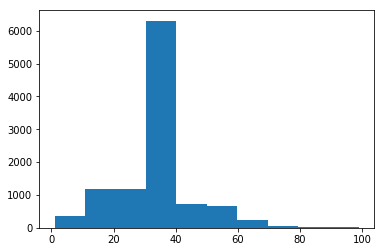

In [46]:
plt.hist(income[income['sex']==' Female']['hours-per-week'])

In [47]:
#so both male and female(maximum) work 30-40 hours per a week
#so 8 hours per a day
#if we exclude sat and sunday.

In [48]:
#Yes,the bachelors category are more in getting more than 50K
#i wan to see in which age they are getting
ss = income[(income['salary_num']==1) & (income['education']==' Bachelors')]

In [49]:
ss.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_num
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,1
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K,1
25,56,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K,1
45,57,Federal-gov,337895,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0,0,40,United-States,>50K,1
53,50,Federal-gov,251585,Bachelors,13,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,55,United-States,>50K,1


In [50]:
de={'17-27':0,'27-37':0,'37-47':0,'47-57':0,'57-67':0,'67-77':0,'77-90':0}

In [51]:
for i in ss['age']:
    fff(i)

In [52]:
de

{'17-27': 58,
 '27-37': 631,
 '37-47': 832,
 '47-57': 465,
 '57-67': 190,
 '67-77': 36,
 '77-90': 7}

In [53]:
age = list(de.keys())
number = list(de.values())

Text(0,0.5,'occurace')

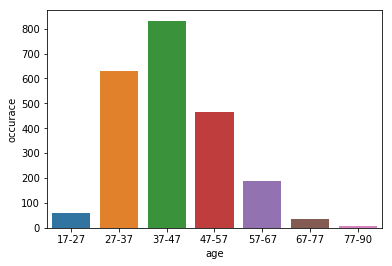

In [54]:
sns.barplot(age,number)
plt.xlabel('age')
plt.ylabel('occurace')

In [55]:
#so most of the Bacelors get at >50K at the age between 27-47

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

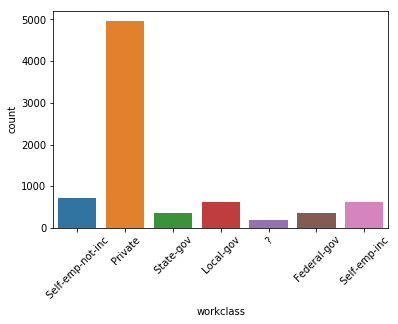

In [56]:
sns.countplot(income[income['salary_num']==1]['workclass'])
plt.xticks(rotation=45)

In [57]:
#so if you get in to a private sector there is a higher chance that you will get more than >50K

In [58]:
#I can see in every column there is ? it is kind of null values
#lets replace this ? with nan values

In [59]:
income['salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [60]:
#workclass,occupation,nativecountry these are the columns which contains ? values

In [61]:
income['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [62]:
income.replace(' ?',np.NaN,inplace=True)

In [63]:
income.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
salary_num           0
dtype: int64

In [64]:
income.iloc[27]['workclass']

nan

In [65]:
income['workclass']=income['workclass'].fillna('missing')

In [66]:
income['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
missing               1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [67]:
income['occupation']=income['occupation'].fillna('missing')

In [68]:
income['native-country']=income['native-country'].fillna('missing')

In [69]:
income.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
salary_num        0
dtype: int64

In [70]:
#so now go for machine learning model
#its a binary classification problem
#first we will apply logistic regression

In [71]:
#Before that data preprocessing

In [72]:
income_backup = income.copy()

In [73]:
income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_num
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [74]:
#since education number and education both are equal we will remove education number
income.drop(['education-num'],inplace=True,axis=1)

In [75]:
income['capital-loss'].value_counts()


0       31042
1902      202
1977      168
1887      159
1848       51
1485       51
2415       49
1602       47
1740       42
1590       40
1876       39
1672       34
1564       25
2258       25
1669       24
1741       24
2001       24
1980       23
1719       22
2002       21
2051       21
1408       21
1579       20
2377       20
1721       18
1504       18
1974       18
2339       17
2179       15
1628       15
        ...  
323         3
4356        3
2267        3
3683        2
1755        2
2352        2
1648        2
1138        2
810         2
1735        2
2238        2
2754        2
3004        2
3900        2
974         2
2149        2
1816        2
3770        2
2080        1
2489        1
2282        1
2163        1
155         1
2467        1
1844        1
1411        1
1539        1
2472        1
1944        1
2201        1
Name: capital-loss, Length: 92, dtype: int64

In [76]:
#since capital-gain and capital-loss most of the value contains zero lets remove it

In [77]:
income.drop(['capital-gain','capital-loss'],axis=1,inplace=True)

In [78]:
income.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary_num
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,0
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,0


In [79]:
#lets remove salary as we have converted it to the salary_num values
#and it is our targeted column
income.drop('salary',axis=1,inplace=True)

In [80]:
income.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary_num
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0


In [81]:
income['workclass']=income['workclass'].replace('missing',' private')

In [82]:
income['native-country'].value_counts()
income['native-country']=income['native-country'].replace('missing',' United-States')

In [83]:
income.head(3)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary_num
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0


In [84]:
#marital status and relationship i think both are highly corelated

In [85]:
#we will upgrade it

In [86]:
def con(gender):
    if gender==' Male':
        return 1
    else:
        return 0
income['sex'] = income['sex'].apply(con)

In [87]:
income.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary_num
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,1,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,1,13,United-States,0
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,1,40,United-States,0
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,40,United-States,0
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,0,40,Cuba,0


In [88]:
#Lets remove fnlwgt for now
income.drop('fnlwgt',axis=1,inplace=True)

In [89]:
income.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary_num
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,1,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,1,13,United-States,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,1,40,United-States,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,40,United-States,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,0,40,Cuba,0


In [90]:
category = income.select_dtypes(include=['object'])

In [91]:
category.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'native-country'],
      dtype='object')

In [92]:
#lets convert all the categorical values to the numerical values
cat_columns = ['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'native-country']
dummy_df = pd.get_dummies(income[cat_columns])
income = pd.concat([income,dummy_df],axis=1)
income.drop(cat_columns,axis=1,inplace=True)

In [93]:
income.head()

,age,sex,hours-per-week,salary_num,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,1,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,1,13,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,1,40,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,1,40,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,0,40,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
income['salary_num'].value_counts()

0    24720
1     7841
Name: salary_num, dtype: int64

In [95]:
#Now lets apply Logistic Regression

In [96]:
x = income
y = income['salary_num']

In [97]:
l=[]
for i in income.columns:
    if i=="salary_num":
        pass
    else:
        l.append(i)

In [98]:
x = income[l]
y = income['salary_num']

In [99]:
x

,age,sex,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,1,40,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,50,1,13,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,38,1,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,1,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,0,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,37,0,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,49,0,16,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,52,1,45,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
8,31,0,50,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,42,1,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
sc_x = StandardScaler()

In [102]:
x = sc_x.fit_transform(x)

In [103]:
x = pd.DataFrame(x)

In [104]:
x

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,0.030671,0.703071,-0.035429,-0.174295,-0.262097,-0.014664,-1.516792,-0.188389,-0.290936,4.907700,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173
1,0.837109,0.703071,-2.222153,-0.174295,-0.262097,-0.014664,-1.516792,-0.188389,3.437186,-0.203761,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173
2,-0.042642,0.703071,-0.035429,-0.174295,-0.262097,-0.014664,0.659286,-0.188389,-0.290936,-0.203761,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173
3,1.057047,0.703071,-0.035429,-0.174295,-0.262097,-0.014664,0.659286,-0.188389,-0.290936,-0.203761,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173
4,-0.775768,-1.422331,-0.035429,-0.174295,-0.262097,-0.014664,0.659286,-0.188389,-0.290936,-0.203761,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,-3.255119,-0.045408,-0.022173
5,-0.115955,-1.422331,-0.035429,-0.174295,-0.262097,-0.014664,0.659286,-0.188389,-0.290936,-0.203761,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173
6,0.763796,-1.422331,-1.979184,-0.174295,-0.262097,-0.014664,0.659286,-0.188389,-0.290936,-0.203761,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,-3.255119,-0.045408,-0.022173
7,0.983734,0.703071,0.369519,-0.174295,-0.262097,-0.014664,-1.516792,-0.188389,3.437186,-0.203761,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173
8,-0.555830,-1.422331,0.774468,-0.174295,-0.262097,-0.014664,0.659286,-0.188389,-0.290936,-0.203761,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173
9,0.250608,0.703071,-0.035429,-0.174295,-0.262097,-0.014664,0.659286,-0.188389,-0.290936,-0.203761,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173


In [105]:
from sklearn.cross_validation import train_test_split

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [106]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [107]:
from sklearn.linear_model import LogisticRegression

In [108]:
obj = LogisticRegression()
obj.fit(x_train,y_train)
y_pred = obj.predict(x_test)

In [109]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [110]:
cm

array([[4498,  420],
       [ 687,  908]], dtype=int64)

In [111]:
4498+908

5406

In [112]:
687+420

1107

In [113]:
5406+1107

6513

In [114]:
5406/6513

0.8300322432058959

In [115]:
from sklearn.cross_validation import cross_val_score

In [116]:
scores = cross_val_score(obj,x,y,cv=10,scoring='accuracy')

In [117]:
scores

array([ 0.82990482,  0.83323096,  0.83353808,  0.8227887 ,  0.83538084,
        0.83169533,  0.83906634,  0.8470516 ,  0.84244472,  0.83445946])

In [118]:
np.mean(scores)

0.83495608400428778

In [119]:
income.head()

,age,sex,hours-per-week,salary_num,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,1,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,1,13,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,1,40,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,1,40,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,0,40,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
x = income[l]
y = income['salary_num']

In [121]:
from sklearn.tree import DecisionTreeClassifier

In [122]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [123]:
obj = DecisionTreeClassifier()
obj.fit(x_train,y_train)
y_pred_test = obj.predict(x_test)
y_pred_train = obj.predict(x_train)

In [124]:
from sklearn.metrics import roc_auc_score

In [125]:
roc_auc_score(y_test,y_pred_test)

0.69058185505346392

In [126]:
roc_auc_score(y_train,y_pred_train)

0.94856391380846738

In [127]:
#overfitting is not occuring

In [128]:
#Decision tree is not giving good result

In [129]:
#Random Forest

In [130]:
from sklearn.ensemble import RandomForestClassifier

In [131]:
obj  = RandomForestClassifier(n_estimators=150)
obj.fit(x_train,y_train)
y_pred_test = obj.predict(x_test)
y_pred_train = obj.predict(x_train)

In [132]:
roc_auc_score(y_test,y_pred_test)

0.7206293016919989

In [133]:
roc_auc_score(y_train,y_pred_train)

0.95725493986565136

In [134]:
#Random forest did not work well also.

In [135]:
#feature engineering might work ....lets see

In [136]:
#33 to 55
#17 t0 32
#56 to 90

In [138]:
income_backup.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_num
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [142]:
fig = plt.figure(figsize=(12,5))

(array([ 5570.,  5890.,  6048.,  6163.,  3967.,  2591.,  1595.,   496.,
          174.,    67.]),
 array([ 17. ,  24.3,  31.6,  38.9,  46.2,  53.5,  60.8,  68.1,  75.4,
         82.7,  90. ]),
 <a list of 10 Patch objects>)

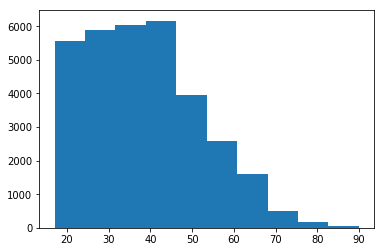

In [149]:
plt.hist(income_backup['age'])

(array([ 5509.,  5086.,  4371.,  3934.,  2372.,  1667.,  1178.,   402.,
          145.,    56.]),
 array([ 17. ,  24.3,  31.6,  38.9,  46.2,  53.5,  60.8,  68.1,  75.4,
         82.7,  90. ]),
 <a list of 10 Patch objects>)

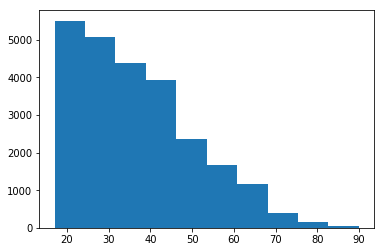

In [150]:
plt.hist(income_backup[income_backup['salary']==' <=50K']['age'])

(array([  177.,  1068.,  1843.,  1971.,  1480.,   847.,   321.,    94.,
           29.,    11.]),
 array([ 19. ,  26.1,  33.2,  40.3,  47.4,  54.5,  61.6,  68.7,  75.8,
         82.9,  90. ]),
 <a list of 10 Patch objects>)

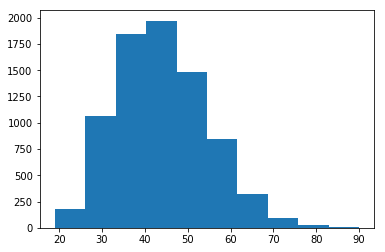

In [151]:
plt.hist(income_backup[income_backup['salary']==' >50K']['age'])

In [152]:
#17,36,54,90

In [ ]:
cut_points=[17,36,54,90]
income_backup['age_categories'] = pd.cut(income_backup['age'],cut_points)

In [155]:
income_backup.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_num,age_categories
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,"(36, 54]"
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,"(36, 54]"
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,"(36, 54]"
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,"(36, 54]"
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,"(17, 36]"


In [157]:
#lets convert all the categorical values to the numerical values
cat_columns = ['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'native-country','age_categories']
dummy_df = pd.get_dummies(income_backup[cat_columns])
income_backup = pd.concat([income_backup,dummy_df],axis=1)
income_backup.drop(cat_columns,axis=1,inplace=True)

In [158]:
income_backup.head()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,salary,salary_num,workclass_ Federal-gov,...,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,native-country_missing,"age_categories_(17, 36]","age_categories_(36, 54]","age_categories_(54, 90]"
0,39,77516,13,Male,2174,0,40,<=50K,0,0,...,0,0,0,1,0,0,0,0,1,0
1,50,83311,13,Male,0,0,13,<=50K,0,0,...,0,0,0,1,0,0,0,0,1,0
2,38,215646,9,Male,0,0,40,<=50K,0,0,...,0,0,0,1,0,0,0,0,1,0
3,53,234721,7,Male,0,0,40,<=50K,0,0,...,0,0,0,1,0,0,0,0,1,0
4,28,338409,13,Female,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0


In [159]:
income_backup.drop(['age','fnlwgt','education-num','capital-loss','capital-gain'],axis=1,inplace=True)

In [160]:
def sex_num(m):
    if m==' male':
        return 1
    else:
        return 0
income_backup['sex'] = income_backup['sex'].apply(sex_num)

In [162]:
income_backup.drop('salary',axis=1,inplace=True)

In [163]:
income_backup.head()

,sex,hours-per-week,salary_num,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,native-country_missing,"age_categories_(17, 36]","age_categories_(36, 54]","age_categories_(54, 90]"
0,0,40,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,0,13,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [164]:
x = income[l]
y = income['salary_num']

In [165]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x)
x = pd.DataFrame(x)

In [168]:
from sklearn.linear_model import LogisticRegression

In [170]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [175]:
obj = LogisticRegression()
obj.fit(x_train,y_train)
y_pred = obj.predict(x_test)

In [176]:
cm = confusion_matrix(y_test,y_pred)

In [177]:
cm

array([[4498,  420],
       [ 687,  908]], dtype=int64)

In [178]:
687+420

1107

In [221]:
obj = DecisionTreeClassifier(max_depth=7,min_samples_split=3)
obj.fit(x_train,y_train)
y_pred = obj.predict(x_test)

In [222]:
cm = confusion_matrix(y_test,y_pred)

In [223]:
cm

array([[4537,  381],
       [ 757,  838]], dtype=int64)

In [224]:
757+381

1138

In [203]:
4534+838

5372

In [252]:
obj = RandomForestClassifier(max_depth=10,min_samples_split=3,n_estimators=15)
obj.fit(x_train,y_train)
y_pred = obj.predict(x_test)

In [253]:
cm = confusion_matrix(y_test,y_pred)

In [254]:
cm

array([[4654,  264],
       [ 861,  734]], dtype=int64)

In [255]:
income_backup.head()

,sex,hours-per-week,salary_num,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,native-country_missing,"age_categories_(17, 36]","age_categories_(36, 54]","age_categories_(54, 90]"
0,0,40,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,0,13,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [256]:
income_backup['hours-per-week'].value_counts()

40    15217
50     2819
45     1824
60     1475
35     1297
20     1224
30     1149
55      694
25      674
48      517
38      476
15      404
70      291
10      278
32      266
24      252
65      244
36      220
42      219
44      212
16      205
12      173
43      151
37      149
8       145
52      138
80      133
56       97
28       86
99       85
      ...  
19       14
64       14
51       13
85       13
68       12
98       11
11       11
63       10
78        8
29        7
77        6
59        5
31        5
96        5
67        4
91        3
76        3
81        3
73        2
89        2
97        2
88        2
86        2
61        2
95        2
92        1
94        1
87        1
74        1
82        1
Name: hours-per-week, Length: 94, dtype: int64

In [257]:
#can we convert hours of week to get a better accuracy...May the hours of week reveal some pattern

In [258]:
min(income_backup['hours-per-week'])

1

In [259]:
max(income_backup['hours-per-week'])

99

(array([   65.,   130.,   158.,  3632.,  1076.,  1728.,   776.,   156.,
           79.,    41.]),
 array([  1. ,  10.8,  20.6,  30.4,  40.2,  50. ,  59.8,  69.6,  79.4,
         89.2,  99. ]),
 <a list of 10 Patch objects>)

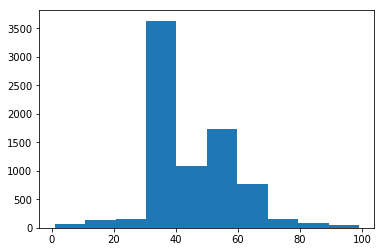

In [260]:
plt.hist(income_backup[income_backup['salary_num']==1]['hours-per-week'])

In [261]:
#1 to 30
#30 to 40
#40 to 50
#50 to 60
#60 to 99

In [268]:
cut_points = [1,30,40,50,60,99]
income_backup['hours-per-week-categories']=pd.cut(income_backup['hours-per-week'],cut_points)

In [266]:
income_backup.head(2)

,sex,hours-per-week,salary_num,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,native-country_missing,"age_categories_(17, 36]","age_categories_(36, 54]","age_categories_(54, 90]"
0,0,40,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,0,13,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [270]:
income_backup.drop('hours-per-week',axis=1,inplace=True)

In [272]:
#lets convert all the categorical values to the numerical values
cat_columns = ['hours-per-week-categories']
dummy_df = pd.get_dummies(income_backup[cat_columns])
income_backup = pd.concat([income_backup,dummy_df],axis=1)
income_backup.drop(cat_columns,axis=1,inplace=True)

In [273]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [274]:
obj = LogisticRegression()
obj.fit(x_train,y_train)
y_pred = obj.predict(x_test)

In [275]:
cm = confusion_matrix(y_test,y_pred)

In [276]:
cm

array([[4498,  420],
       [ 687,  908]], dtype=int64)

In [277]:
687+420

1107

In [290]:
obj = DecisionTreeClassifier(max_depth=1,min_samples_split=4)
obj.fit(x_train,y_train)
y_pred = obj.predict(x_test)

In [291]:
cm

array([[4498,  420],
       [ 687,  908]], dtype=int64)

In [293]:
x = income_[l]
y = income['salary_num']

In [296]:
l1=[]
for i in income_backup.columns:
    if i=='salary_num':
        pass
    else:
        l1.append(i)
    

In [298]:
x = income_backup[l1]

In [300]:
y = income_backup['salary_num']

In [307]:
x.head()

,sex,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,workclass_missing,...,native-country_ Yugoslavia,native-country_missing,"age_categories_(17, 36]","age_categories_(36, 54]","age_categories_(54, 90]","hours-per-week-categories_(1, 30]","hours-per-week-categories_(30, 40]","hours-per-week-categories_(40, 50]","hours-per-week-categories_(50, 60]","hours-per-week-categories_(60, 99]"
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [308]:
sc_x = StandardScaler()
x = sc_x.fit_transform(x)
x = pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
0,0.0,-0.174295,-0.262097,-0.014664,-1.516792,-0.188389,-0.290936,4.907700,-0.02074,-0.244450,...,-0.022173,-0.135023,-0.948939,1.289336,-0.400869,-0.437195,0.914316,-0.472271,-0.290439,-0.187864
1,0.0,-0.174295,-0.262097,-0.014664,-1.516792,-0.188389,3.437186,-0.203761,-0.02074,-0.244450,...,-0.022173,-0.135023,-0.948939,1.289336,-0.400869,2.287306,-1.093714,-0.472271,-0.290439,-0.187864
2,0.0,-0.174295,-0.262097,-0.014664,0.659286,-0.188389,-0.290936,-0.203761,-0.02074,-0.244450,...,-0.022173,-0.135023,-0.948939,1.289336,-0.400869,-0.437195,0.914316,-0.472271,-0.290439,-0.187864
3,0.0,-0.174295,-0.262097,-0.014664,0.659286,-0.188389,-0.290936,-0.203761,-0.02074,-0.244450,...,-0.022173,-0.135023,-0.948939,1.289336,-0.400869,-0.437195,0.914316,-0.472271,-0.290439,-0.187864
4,0.0,-0.174295,-0.262097,-0.014664,0.659286,-0.188389,-0.290936,-0.203761,-0.02074,-0.244450,...,-0.022173,-0.135023,1.053809,-0.775593,-0.400869,-0.437195,0.914316,-0.472271,-0.290439,-0.187864
5,0.0,-0.174295,-0.262097,-0.014664,0.659286,-0.188389,-0.290936,-0.203761,-0.02074,-0.244450,...,-0.022173,-0.135023,-0.948939,1.289336,-0.400869,-0.437195,0.914316,-0.472271,-0.290439,-0.187864
6,0.0,-0.174295,-0.262097,-0.014664,0.659286,-0.188389,-0.290936,-0.203761,-0.02074,-0.244450,...,-0.022173,-0.135023,-0.948939,1.289336,-0.400869,2.287306,-1.093714,-0.472271,-0.290439,-0.187864
7,0.0,-0.174295,-0.262097,-0.014664,-1.516792,-0.188389,3.437186,-0.203761,-0.02074,-0.244450,...,-0.022173,-0.135023,-0.948939,1.289336,-0.400869,-0.437195,-1.093714,2.117427,-0.290439,-0.187864
8,0.0,-0.174295,-0.262097,-0.014664,0.659286,-0.188389,-0.290936,-0.203761,-0.02074,-0.244450,...,-0.022173,-0.135023,1.053809,-0.775593,-0.400869,-0.437195,-1.093714,2.117427,-0.290439,-0.187864
9,0.0,-0.174295,-0.262097,-0.014664,0.659286,-0.188389,-0.290936,-0.203761,-0.02074,-0.244450,...,-0.022173,-0.135023,-0.948939,1.289336,-0.400869,-0.437195,0.914316,-0.472271,-0.290439,-0.187864


In [310]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [311]:
obj = LogisticRegression()
obj.fit(x_train,y_train)
y_pred = obj.predict(x_test)

In [312]:
cm = confusion_matrix(y_test,y_pred)

In [313]:
cm

array([[4526,  392],
       [ 700,  895]], dtype=int64)

In [314]:
700+392

1092

In [315]:
1107-1092

15

In [316]:
4526+895

5421

In [317]:
5421/(5421+1092)

0.8323353293413174

In [318]:
scores = cross_val_score(obj,x,y,cv=10,scoring='accuracy')

In [319]:
np.mean(scores)

0.8388256271315836

In [330]:
obj = DecisionTreeClassifier(max_depth=10,min_samples_split=4)
obj.fit(x_train,y_train)
y_pred = obj.predict(x_test)

In [331]:
cm = confusion_matrix(y_test,y_pred)

In [332]:
cm

array([[4515,  403],
       [ 757,  838]], dtype=int64)

In [342]:
obj =RandomForestClassifier(max_depth=40,min_samples_split=4)
obj.fit(x_train,y_train)
y_pred = obj.predict(x_test)

In [343]:
cm = confusion_matrix(y_test,y_pred)

In [344]:
cm

array([[4455,  463],
       [ 697,  898]], dtype=int64)

In [345]:
697+463

1160